<h1 align="center"> Key Drivers of Property Prices in the Chicago Housing Market: Insights for Strategic Investments

<h2 align="center">Introduction</h2>

In the dynamic real estate market of Chicago, understanding the factors that drive property prices is crucial for making informed investment decisions. Our comprehensive analysis sheds light on the key elements that significantly influence property values, offering valuable insights for executives at investment firms. By identifying these critical drivers, we aim to empower you with the knowledge to optimize your investment strategies and maximize returns in the Chicago housing market.

Our study reveals surprising trends and actionable recommendations that can guide your future investments. Whether you are considering developing new properties, acquiring existing ones, or advising clients, these insights will enhance your decision-making process and help you stay ahead in a competitive market.

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

First we will need to explore our dataset

In [46]:
#load dataset
data = pd.read_csv('real_estate_data_chicago.csv')

In [47]:
#explore data
data.head()

,type,text,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice,status
0,single_family,"Come check out this amazing, move-in ready, 5 ...",1951.0,4.0,4.0,3.0,1.0,1.0,5615.0,3000.0,2.0,NaN,NaN,750000.0,for_sale
1,single_family,Move in ready 2 story Mount Greenwood home on ...,1922.0,4.0,3.0,2.0,1.0,2.0,6566.0,2900.0,2.0,105000.0,1991-04-16,499900.0,for_sale
2,single_family,Investor Special MONEY MAKING Gem. This is you...,1947.0,4.0,2.0,2.0,NaN,3.0,5375.0,1170.0,2.0,60000.0,2019-10-28,325600.0,for_sale
3,single_family,Renovated Brick 1.5 story house with finished ...,1945.0,4.0,3.0,2.0,1.0,2.0,6138.0,2511.0,2.0,170000.0,1996-05-30,620000.0,for_sale
4,single_family,This almost 3000sq foot home was thoughtfully ...,1907.0,4.0,4.0,2.0,2.0,2.0,8476.0,2870.0,3.0,NaN,NaN,850000.0,for_sale


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           2000 non-null   object 
 1   text           1992 non-null   object 
 2   year_built     1790 non-null   float64
 3   beds           1940 non-null   float64
 4   baths          1999 non-null   float64
 5   baths_full     1937 non-null   float64
 6   baths_half     592 non-null    float64
 7   garage         1282 non-null   float64
 8   lot_sqft       992 non-null    float64
 9   sqft           1447 non-null   float64
 10  stories        1620 non-null   float64
 11  lastSoldPrice  1415 non-null   float64
 12  soldOn         1415 non-null   object 
 13  listPrice      1994 non-null   float64
 14  status         2000 non-null   object 
dtypes: float64(11), object(4)
memory usage: 234.5+ KB


In [49]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year_built,1790.0,1946.050838,3.898590e+01,1856.0,1916.0,1943.0,1970.75,2024.0
beds,1940.0,3.288660,1.758550e+00,0.0,2.0,3.0,4.00,21.0
baths,1999.0,2.439720,1.456490e+00,0.0,2.0,2.0,3.00,13.0
baths_full,1937.0,2.155911,1.106637e+00,1.0,1.0,2.0,3.00,8.0
baths_half,592.0,1.189189,5.531188e-01,1.0,1.0,1.0,1.00,5.0
garage,1282.0,2.131825,1.136729e+01,1.0,1.0,2.0,2.00,400.0
lot_sqft,992.0,7156.208669,6.861154e+04,1.0,3125.0,3750.0,5013.00,2156000.0
sqft,1447.0,2069.910159,1.691518e+03,372.0,1170.0,1550.0,2355.00,25000.0
stories,1620.0,7.183951,1.303682e+01,1.0,2.0,2.0,4.00,119.0
lastSoldPrice,1415.0,368518.594346,6.156896e+05,600.0,111750.0,218000.0,395000.00,7500000.0


The dataset includes information up to the year 2024. However, since 2024 is the current year and may contain incomplete data, we have chosen to conclude our analysis with data up to the end of 2023.

In [59]:
# Convert the 'soldOn' column to datetime
data['soldOn'] = pd.to_datetime(data['soldOn'], errors='coerce')

# Extract the year from the 'soldOn' column
data['year_sold'] = data['soldOn'].dt.year

# Filter out the year 2024
data = data[data['year_sold'] < 2024]

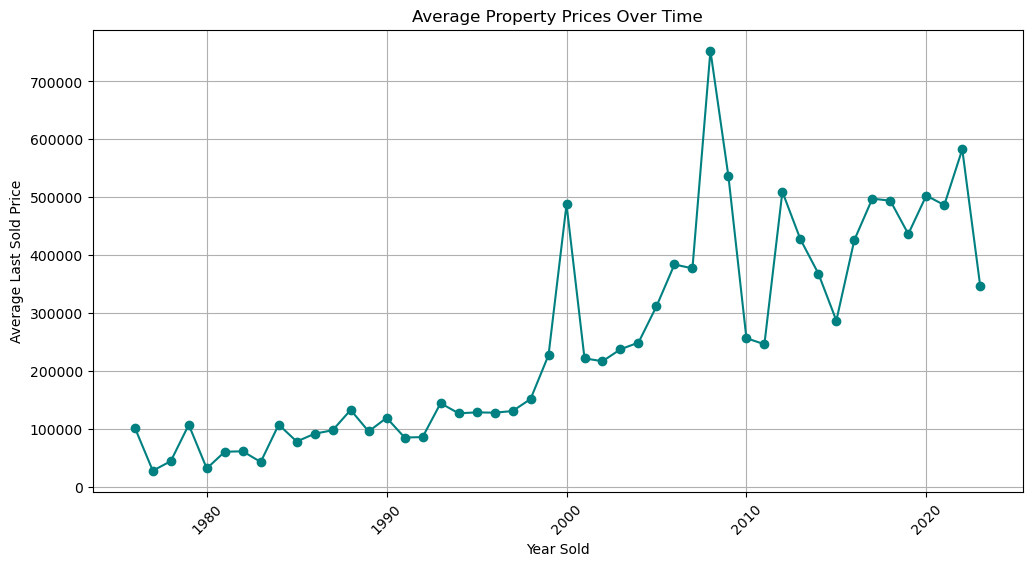

In [81]:
# Group by year and calculate the average price
yearly_prices = data.groupby('year_sold')['lastSoldPrice'].mean().dropna()

# Plot the average price per year
plt.figure(figsize=(12, 6))
plt.plot(yearly_prices.index, yearly_prices.values, marker='o', linestyle='-', color = 'teal')
plt.title('Average Property Prices Over Time')
plt.xlabel('Year Sold')
plt.ylabel('Average Last Sold Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

The graph provides a visual representation of how the average property prices in Chicago have evolved over the past several decades. Key takeaways include:

**Stability Before 2000:** Property prices remained stable with minimal growth, reflecting a period of low market volatility.

**Significant Spikes Around 2000 and 2008:** These spikes highlight the periods of rapid market growth followed by sharp declines, corresponding to the dot-com bubble and the housing market crash, respectively.

**Post-2008 Recovery:** Following the recession, the market shows a steady recovery with increasing property prices, indicating renewed investor confidence and economic recovery.

**Recent Volatility:** In the last few years, there has been increased volatility in property prices, which may be attributed to the global pandemic and other economic uncertainties. Notably, in 2023, there has been a drop in property prices due to rising interest rates, which has affected the affordability of homes and reduced buyer demand.

Overall, the graph underscores the cyclical nature of the real estate market, highlighting periods of growth, decline, and recovery. Understanding these trends is crucial for making strategic investment decisions in the Chicago housing market.

In [63]:
#Identify what missing values we have
missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis = 1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
baths_half,998,70.629866
lot_sqft,684,48.407643
garage,495,35.031847
sqft,396,28.025478
stories,226,15.994338
year_built,150,10.615711
baths_full,43,3.043171
beds,40,2.830856
listPrice,5,0.353857
text,4,0.283086


In [66]:
# Handling Missing Values

def handle_missing_values(data):
    # Make a copy of the DataFrame
    data = data.copy()
    
    # Replace null values in categorical columns with mode
    categorical_columns = data.select_dtypes(include='object').columns
    for col in categorical_columns:
        data.loc[:, col] = data[col].fillna(data[col].mode().iloc[0])

    # Replace null values in numerical columns with mean
    numerical_columns = data.select_dtypes(include=['int', 'float']).columns
    for col in numerical_columns:
        data.loc[:, col] = data[col].fillna(data[col].mean())

    return data

chicago = handle_missing_values(data)

In [67]:
missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis = 1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
type,0,0.0
text,0,0.0
year_built,0,0.0
beds,0,0.0
baths,0,0.0
baths_full,0,0.0
baths_half,0,0.0
garage,0,0.0
lot_sqft,0,0.0
sqft,0,0.0


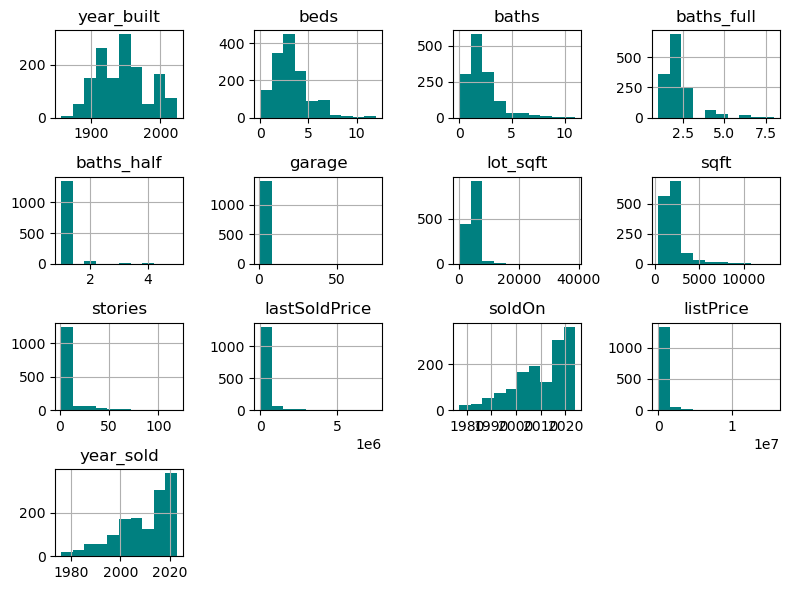

In [69]:
chicago.hist(figsize = (8,6), color = 'teal')

plt.tight_layout()

The histograms illustrate the distribution of various property features and prices in the Chicago housing market. Most properties were built around the mid-1900s and early 2000s, reflecting periods of increased construction activity. The majority of homes have 2 to 4 bedrooms and 1 to 3 bathrooms, with most having 1 to 2 garage spaces. Lot sizes predominantly range up to 10,000 square feet, and square footage typically falls between 1,000 and 3,000 square feet. Properties generally have 1 to 2 stories. The last sold prices and listing prices show significant variability, with most properties priced up to $1 million, but with some high-end outliers. The data shows an increasing number of transactions over time, particularly in recent years, indicating a growing and active housing market in Chicago. This diverse distribution highlights a wide range of property values and features, catering to different buyer needs and market preferences.

<h2 align="center">Determining the Influencing Factors on Property Prices</h2>

To understand what drives property prices in the Chicago housing market, we will analyze key features such as the number of bedrooms, the number of bathrooms, the square footage, and the year the property was built. By examining these variables, we can determine which factors have the most significant impact on property values. This analysis will provide valuable insights for investors and real estate professionals seeking to make informed decisions in this dynamic market.

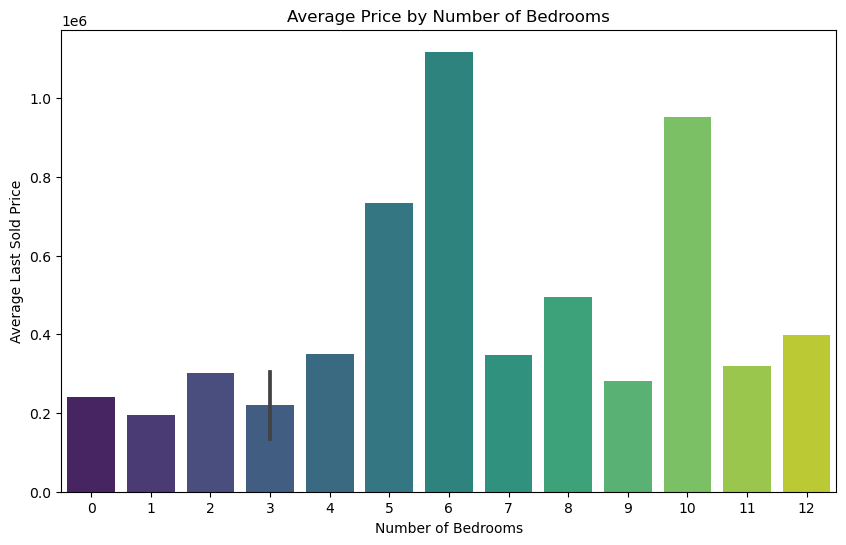

In [75]:
# Calculate average price by number of bedrooms
avg_price_bedrooms = chicago.groupby('beds')['lastSoldPrice'].mean().reset_index()

# Convert the number of bedrooms to integer
avg_price_bedrooms['beds'] = avg_price_bedrooms['beds'].astype(int)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='beds', y='lastSoldPrice', data=avg_price_bedrooms, palette='viridis')
plt.title('Average Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Last Sold Price')
plt.xticks(rotation=0)  # Ensure x-axis labels are horizontal
plt.show()

The bar chart displays the average property price based on the number of bedrooms in the Chicago housing market.

Overall, the chart reveals that properties with 4 to 6 bedrooms tend to have higher average prices, particularly peaking at 6 bedrooms. Conversely, properties with fewer than 3 or more than 7 bedrooms generally have lower average prices. This suggests that the number of bedrooms is a significant factor influencing property prices, with a sweet spot around 4 to 6 bedrooms in the Chicago housing market.

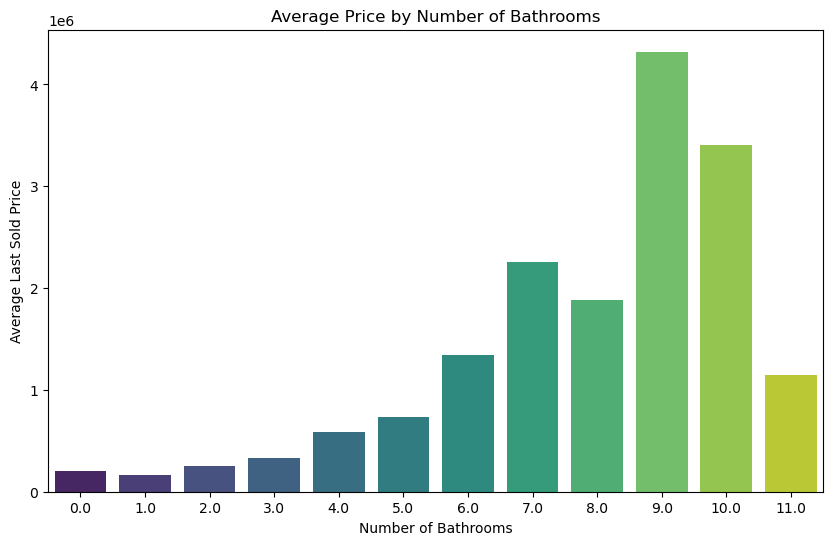

In [33]:
# Calculate average price by number of bathrooms
avg_price_bathrooms = chicago.groupby('baths')['lastSoldPrice'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='baths', y='lastSoldPrice', data=avg_price_bathrooms, palette='viridis')
plt.title('Average Price by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Last Sold Price')
plt.show()

The bar chart illustrates the average property price based on the number of bathrooms in the Chicago housing market.

Overall, the chart reveals a clear trend where properties with more bathrooms tend to have higher average prices. This suggests that the number of bathrooms is a significant factor influencing property prices in the Chicago housing market, with properties featuring 7 or more bathrooms commanding the highest prices.

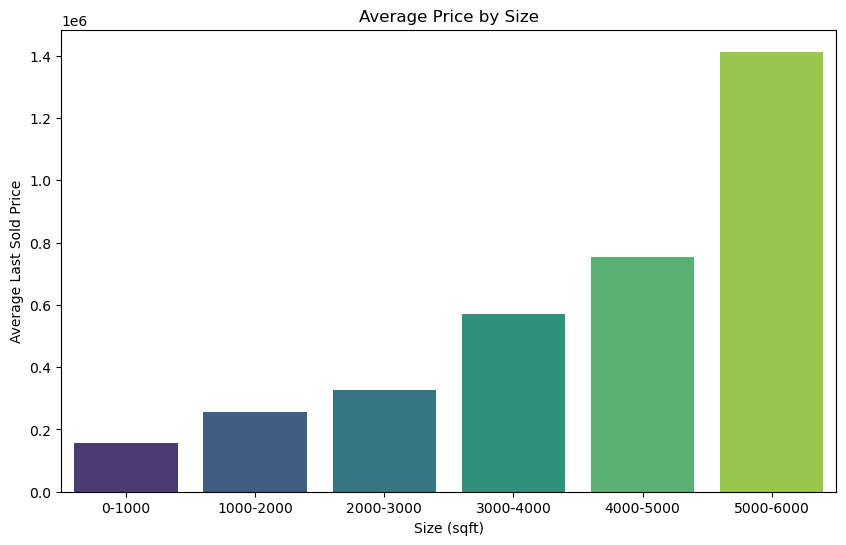

In [76]:
# Create size buckets
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000]
labels = ['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000']
chicago['size_bucket'] = pd.cut(chicago['sqft'], bins=bins, labels=labels)

# Calculate average price by size bucket
avg_price_size = chicago.groupby('size_bucket')['lastSoldPrice'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='size_bucket', y='lastSoldPrice', data=avg_price_size, palette='viridis')
plt.title('Average Price by Size')
plt.xlabel('Size (sqft)')
plt.ylabel('Average Last Sold Price')
plt.show()

The bar chart illustrates the average property price based on different size buckets of square footage in the Chicago housing market

Overall, the chart demonstrates a clear positive correlation between property size and average price. As the square footage increases, the average property price also rises significantly. This trend indicates that larger properties are valued much higher in the Chicago housing market, making square footage a critical factor in determining property prices.

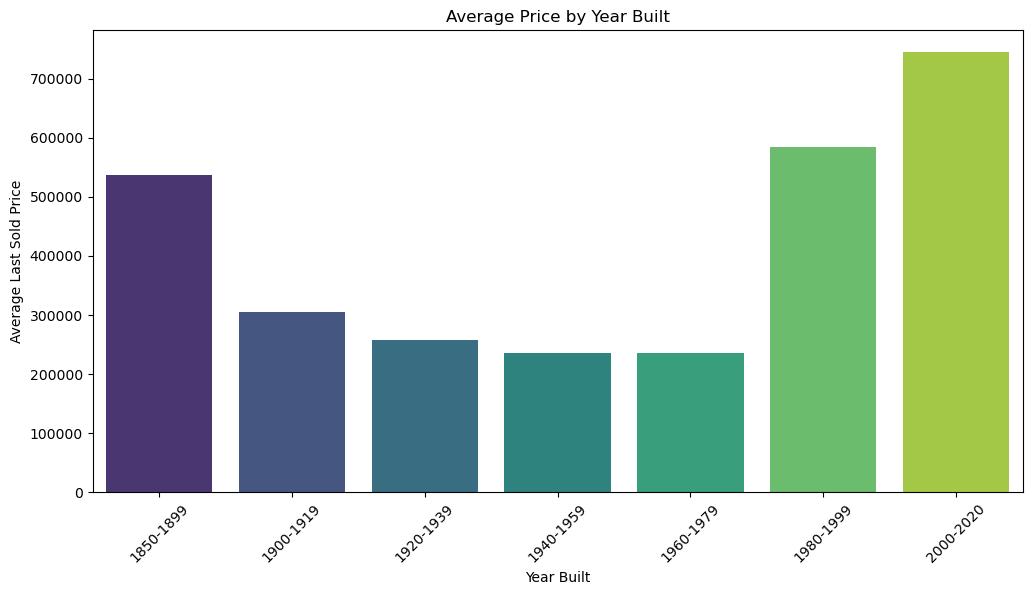

In [77]:
# Create bins for 'year_built'
bins = [1850, 1900, 1920, 1940, 1960, 1980, 2000, 2020]
labels = ['1850-1899', '1900-1919', '1920-1939', '1940-1959', '1960-1979', '1980-1999', '2000-2020']
chicago['year_built_bin'] = pd.cut(chicago['year_built'], bins=bins, labels=labels)

# Calculate average price by year built bin
avg_price_year_built_bin = chicago.groupby('year_built_bin')['lastSoldPrice'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='year_built_bin', y='lastSoldPrice', data=avg_price_year_built_bin, palette='viridis')
plt.title('Average Price by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Average Last Sold Price')
plt.xticks(rotation=45)
plt.show()

The bar chart illustrates the average property price based on the year built, grouped into distinct bins, in the Chicago housing market.

Overall, the chart reveals that newer properties, especially those built after 2000, command the highest average prices, while properties built in the mid-20th century tend to have lower average prices. This trend suggests that the age of the property is a crucial factor influencing property prices, with newer construction being highly desirable in the Chicago housing market.

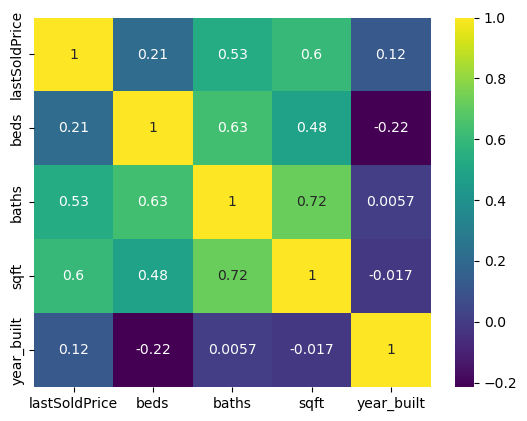

In [79]:
# Correlation matrix
corr_matrix = chicago[['lastSoldPrice', 'beds', 'baths', 'sqft', 'year_built']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.show()

Overall, the heatmap reveals that the strongest correlations with the last sold price are found with the number of bathrooms and the square footage of the property. The number of bedrooms also shows a positive correlation, albeit weaker, while the year built has the weakest correlation with the last sold price. This analysis highlights that square footage and the number of bathrooms are the most significant factors influencing property prices in the Chicago housing market.

In [80]:
# Define independent variables and target variable
X = chicago[['beds', 'baths', 'sqft', 'year_built']]
y = chicago['lastSoldPrice']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          lastSoldPrice   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     253.0
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          7.88e-164
Time:                        05:22:17   Log-Likelihood:                -20459.
No. Observations:                1413   AIC:                         4.093e+04
Df Residuals:                    1408   BIC:                         4.095e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.906e+06   7.04e+05     -4.127      0.0

The regression analysis reveals that the number of bathrooms and square footage are the most significant factors positively influencing property prices in the Chicago housing market. The number of bedrooms has a negative coefficient, possibly indicating older or less desirable properties with more bedrooms. The year built also positively impacts property prices, with newer properties generally valued higher. Despite the significant insights, the high condition number indicates potential multicollinearity, which should be further investigated.

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add a constant to the model
X = chicago[['beds', 'baths', 'sqft', 'year_built']]
X = sm.add_constant(X)

# Calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

     Variable          VIF
0       const  3165.090846
1        beds     1.810946
2       baths     2.743177
3        sqft     2.098109
4  year_built     1.086828


The VIF values for all predictors are comfortably below the critical level, suggesting that multicollinearity is not an issue in our regression model. As a result, we can trust the reliability of the insights and conclusions drawn from this analysis.

<h2 align="center">Key Findings</h2>

**Number of Bedrooms:** Surprisingly, after 6 bedrooms, we start observing that more bedrooms can decrease the property's price by about $72,000. This might be because larger homes with more bedrooms tend to be older or have other features that reduce their value.

**Number of Bathrooms:** Each additional bathroom increases the property's price by approximately $138,800. This is becasue buyers highly value the convenience and comfort of more bathrooms, making them a crucial factor in pricing.

**Square Footage:** Each extra square foot adds about $221 to the property's price. 

**Year Built:** Newer homes are worth more, with each additional year adding roughly $1,396 to the price. 

<h2 align="center">Conclusion</h2>

These factors explain about 42% of the variations in property prices, indicating their significant but not exclusive influence. Other factors like location, neighborhood amenities, and property condition also play a role. The high value placed on additional bathrooms and newer construction highlights specific areas where investment can yield high returns. Surprisingly, more bedrooms don’t necessarily mean a higher price, which could reflect market preferences or specific characteristics of larger homes in the area.

Based on these insights, we recommend that developers focus on building homes with modern amenities and multiple bathrooms, as these features are highly valued by buyers. Buyers and sellers should consider the impact of these factors when pricing properties or making purchasing decisions. Policymakers and planners can use this understanding of market preferences to guide future urban development and housing policies, ensuring they better meet the needs of residents.

The analysis provides clear evidence that factors like the number of bathrooms, property size, and the age of the home significantly influence property prices in Chicago. Leveraging these insights can lead to more informed decisions and better outcomes in the real estate market.